In [1]:
def read_data(path):
    cities = []
    with open(path, "r") as f:
        csv.reader(f, delimiter=" ")
        for line in f:
            data = line.split(" ")
            data = [float(x.replace("\n", "")) for x in data]
            cities.append([data[0],data[1]])
    return cities

## 1. Presudocode
set parameters, initialize phromone trails

__while__ termination condition not met __do__


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*ConstructAntSolution*

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*UpdatePheromone*
   
__endwhile__

## Ant System (AS)

In [2]:
import os
import csv
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt 

In [3]:
class Edge:
    def __init__ (self, o, d):
        self.ori = o
        self.dest = d

In [4]:
def isFeasible(edge, solution_construction): #an edge is feasible if the ant has not chosen the destination node yet
    for e in solution_construction:
        if e.ori == edge.dest or e.dest == edge.dest:
            return False
    return True

In [5]:
def TSP_construct_termination(solution_construction, n):
    return len(solution_construction) == n - 1

In [6]:
def distance(city1, city2):
    x1 = city1[0]
    x2 = city1[1]
    y1 = city2[0]
    y2 = city2[1]
    return pow(pow(x2-x1, 2)+pow(y2-y1,2),1/2)

In [7]:
def calculate_probability(cities, edge, pheromone_trail, solution_construction):
    alpha = 1 # >= 0
    beta = 1 # >= 1
    eta = 1 / distance(cities[edge.ori], cities[edge.dest])
    numerator = pow(pheromone_trail[edge.ori][edge.dest], alpha) * pow(eta, beta)
    
    denominator = 0
    for l, city in enumerate(cities):
        if edge.ori != l:
            if isFeasible(Edge(edge.ori, l), solution_construction):
                denominator += pow(pheromone_trail[edge.ori][l], alpha) * pow(1/distance(cities[edge.ori], city),beta)
    
    return numerator / denominator

In [8]:
def constructAntSolution(cities, pheromone_trail):
    i = 0
    n = len(cities)
    solution_construction = []
    while not TSP_construct_termination(solution_construction, n):
        p = []
        a = []
        for j, city in enumerate(cities):
            if i != j:
                edge = Edge(i, j)
                if isFeasible(edge, solution_construction):
                    p.append(calculate_probability(cities, edge, pheromone_trail, solution_construction))
                else:
                    p.append(0)
                a.append(j)
        
        j = np.random.choice(a, 1, p=p)[0]
        
        solution_construction.append(Edge(i, j))
        i = j
    solution_construction.append(Edge(i, 0))
    return solution_construction

In [9]:
def updatePheromone(pheromone_trail, solutions, cities):
    evaporation_rate = 0.5
    Q = 500
    
    # Evaporation
    for i in range(len(pheromone_trail)):
        for j in range(len(pheromone_trail)):
            pheromone_trail[i][j] *= (1 - evaporation_rate)
    
    for ant_solution in solutions:
        for edge in ant_solution:
            pheromone_trail[edge.ori][edge.dest] += Q / distance(cities[edge.ori], cities[edge.dest])

In [10]:
def updateBest(cities, best_cost, solutions, best_path):
    for sol in solutions:
        total = 0
        for edge in sol:
            total += distance(cities[edge.ori], cities[edge.dest])
        
        if total < best_cost:
            best_path = sol
            best_cost = total
    return best_path, best_cost

In [11]:
def solution_string(sol):
    s = ""
    for e in sol:
        s+= "(" + str(e.ori) + "," + str(e.dest) + ")  "
    print("\n")
    return s

In [27]:
def plot_solution(sol, ant, tour):
    x = []
    y = []
    for edge in sol:
        x.append(edge.ori)
        y.append(edge.dest)
    plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12, label='ey')
    plt.title("(" + tour + ")   Ant " + ant) 
    plt.show() 

In [30]:
def aco(cities, m, n, steps):  
    pheromone_trail = []
    best_path = []
    best_cost = math.inf

    # Initialize trail
    for i in range(n):
        pheromone_trail.append([0.000000001]*n)

    for t in range(tours):
        solutions = []
        print("++++++++++++++++++++++++++++++++++++++++++++++ STEP", t, "++++++++++++++++++++++++++++++++++++++++++++++")
        # For each ant, construct a solution
        for ant in range(m):
            #print("----------------------------------------------- ANT", ant, "----------------------------------------------")
            sol = constructAntSolution(cities, pheromone_trail)

            solutions.append(sol)
            plot_solution(sol, str(ant+1), str(t+1))
            #s = solution_string(sol)
            #print("Solution:", s)

        # Update pheromone trail
        updatePheromone(pheromone_trail, solutions, cities)

        #Update best path
        best_path, best_cost = updateBest(cities, best_cost, solutions, best_path)
        s = solution_string(best_path)
        
        print("------------------------------------------------------------------------------------------------")
        print("|                                                                                              |")
        print("| Best solution (", best_cost, "): ", s)
        print("|                                                                                              |")
        print("------------------------------------------------------------------------------------------------")
    
    
    return best_cost, best_path

++++++++++++++++++++++++++++++++++++++++++++++ STEP 0 ++++++++++++++++++++++++++++++++++++++++++++++


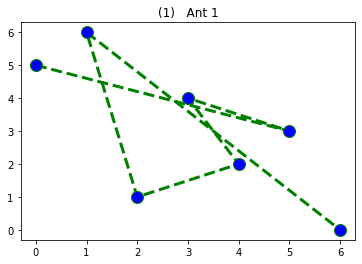

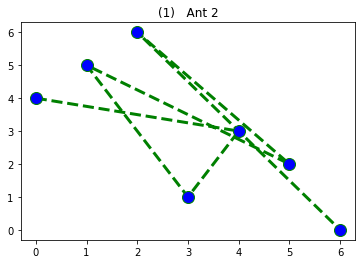

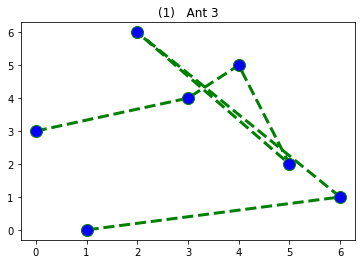

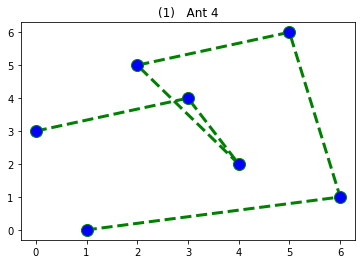

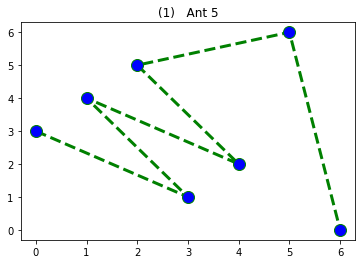

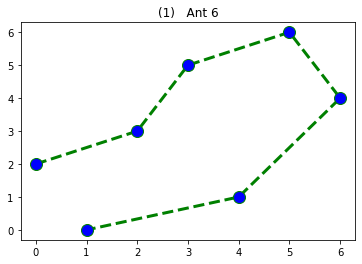

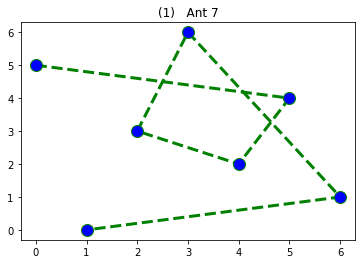

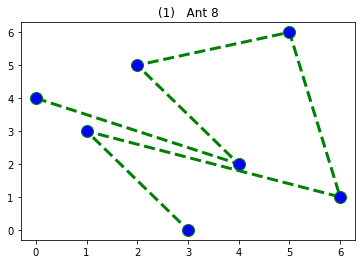

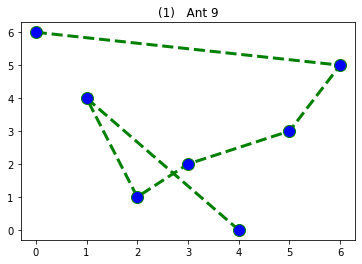

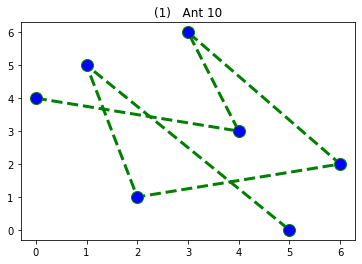



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.25983182647859 ):  (0,3)  (3,4)  (4,5)  (5,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 1 ++++++++++++++++++++++++++++++++++++++++++++++


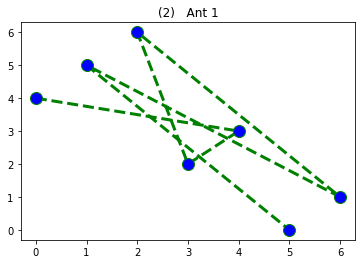

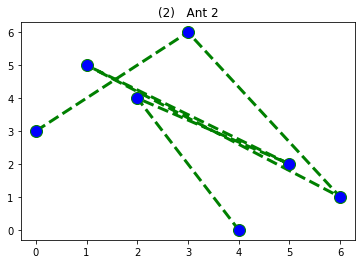

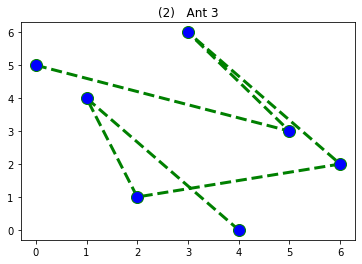

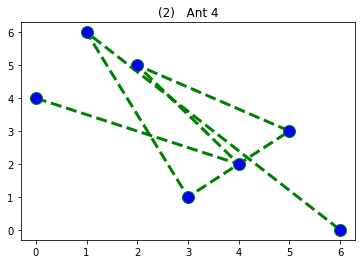

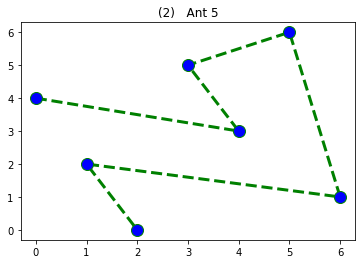

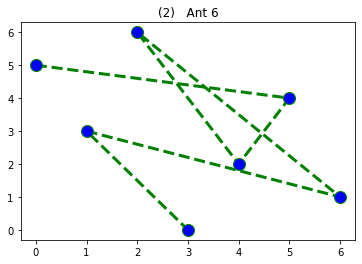

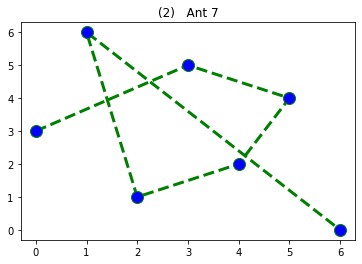

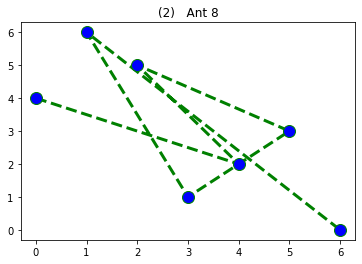

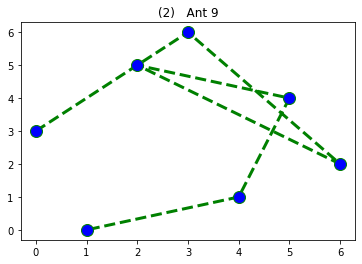

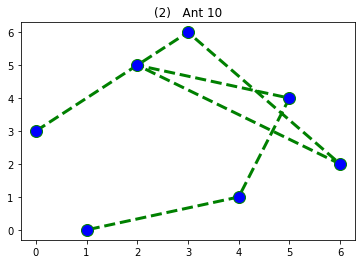



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.25983182647859 ):  (0,3)  (3,4)  (4,5)  (5,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 2 ++++++++++++++++++++++++++++++++++++++++++++++


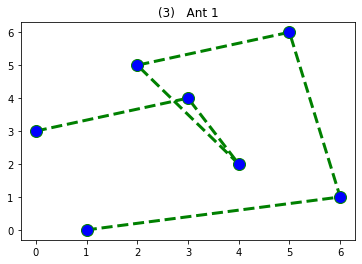

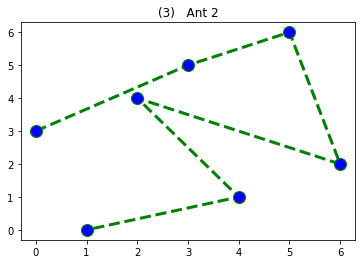

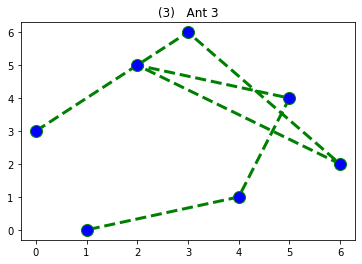

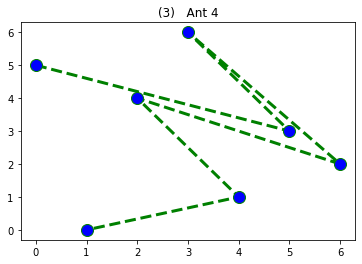

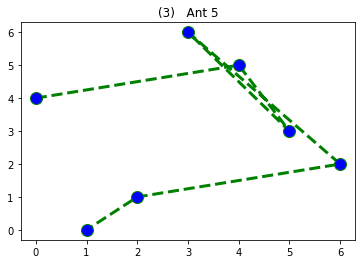

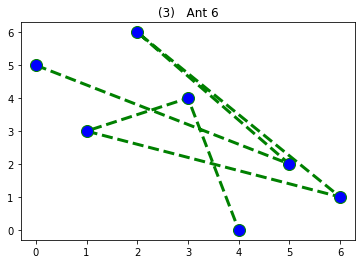

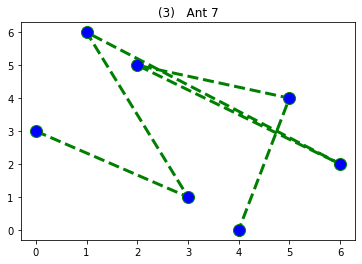

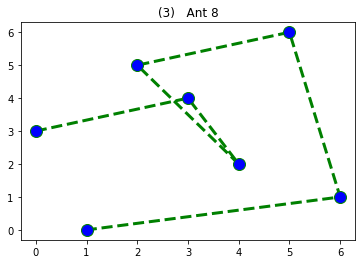

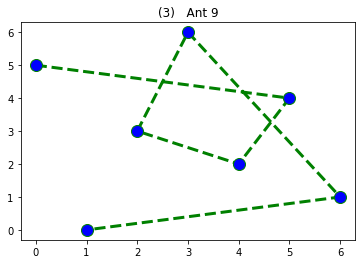

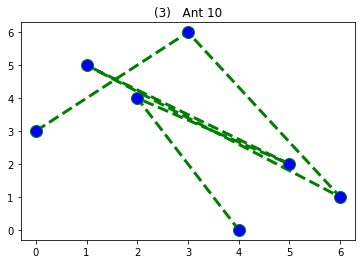



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.25983182647859 ):  (0,3)  (3,4)  (4,5)  (5,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 3 ++++++++++++++++++++++++++++++++++++++++++++++


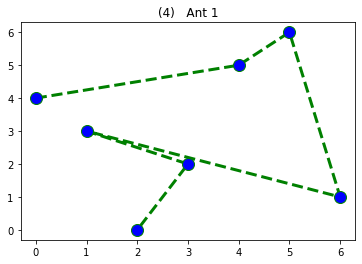

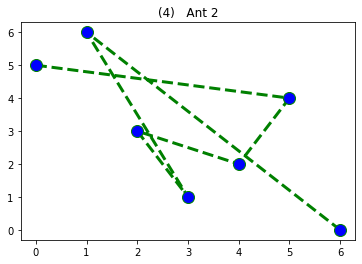

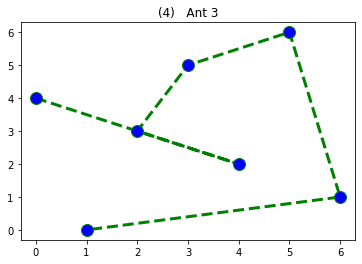

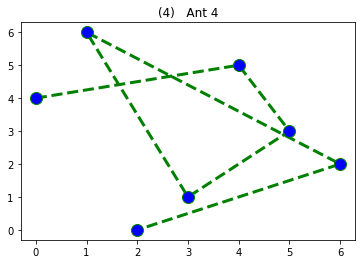

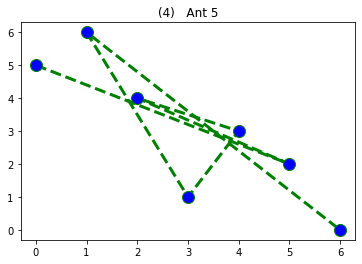

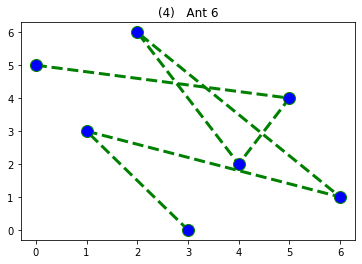

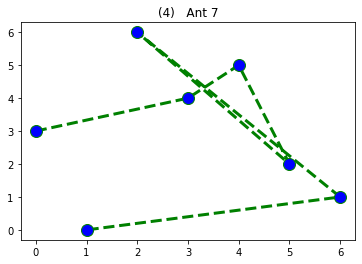

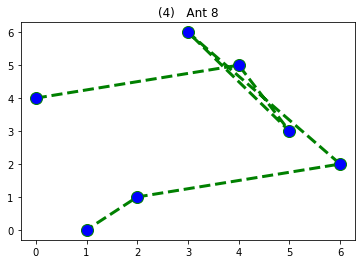

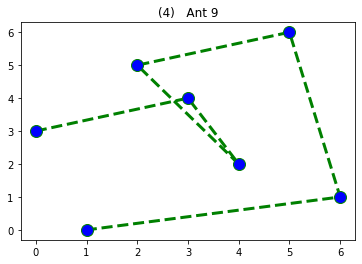

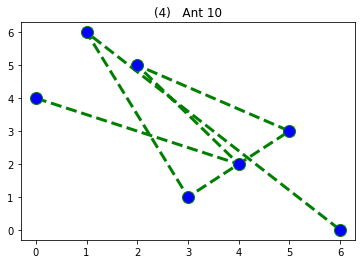



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.25983182647859 ):  (0,3)  (3,4)  (4,5)  (5,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 4 ++++++++++++++++++++++++++++++++++++++++++++++


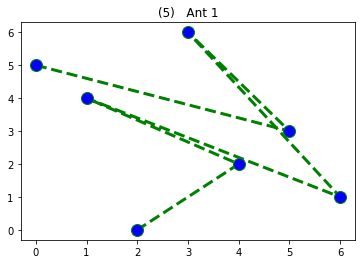

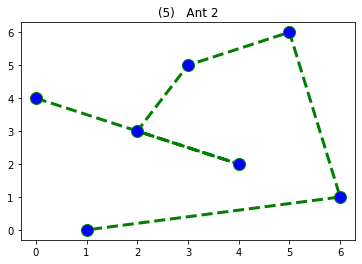

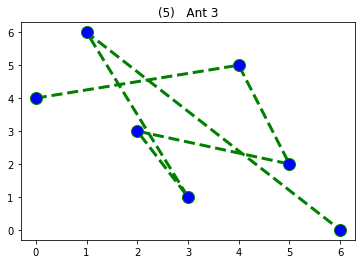

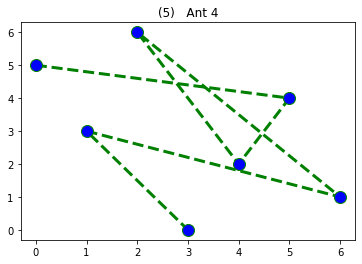

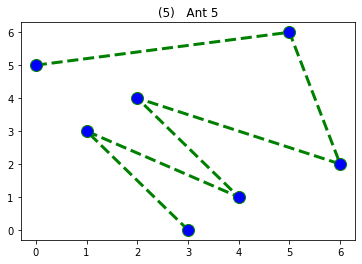

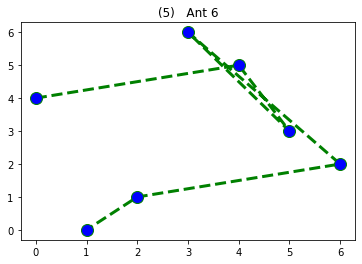

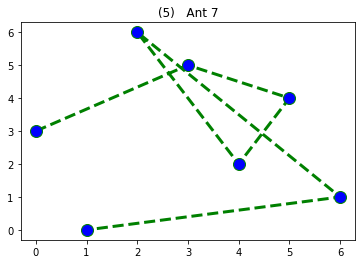

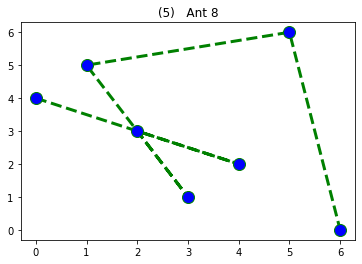

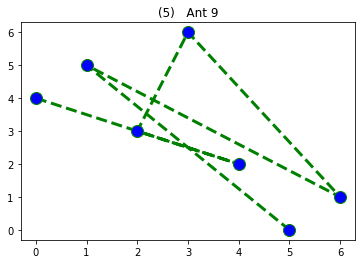

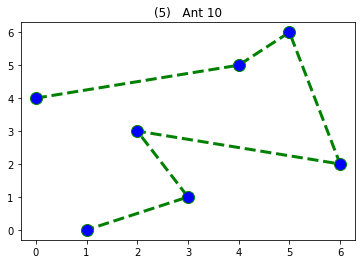



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 5 ++++++++++++++++++++++++++++++++++++++++++++++


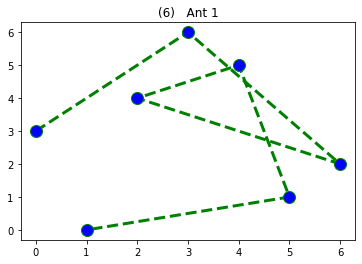

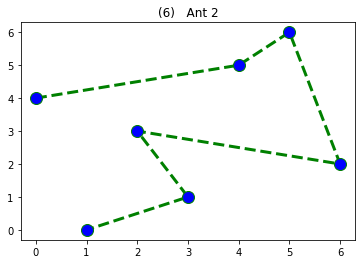

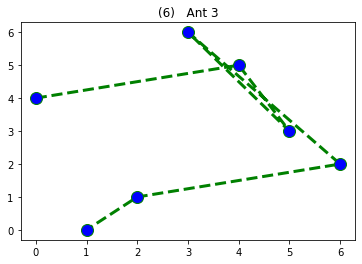

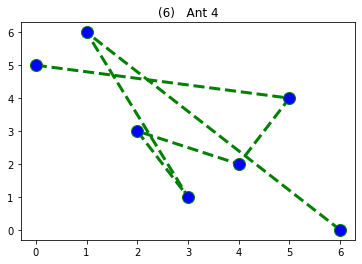

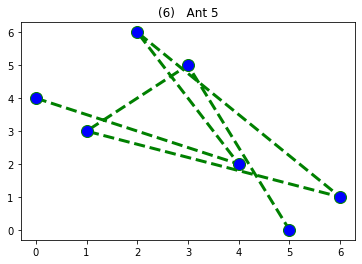

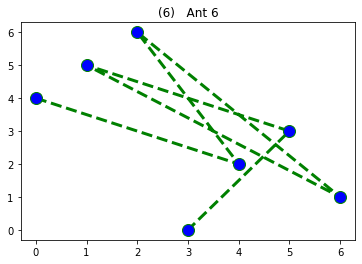

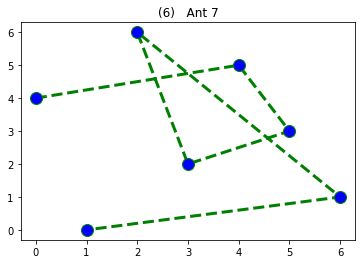

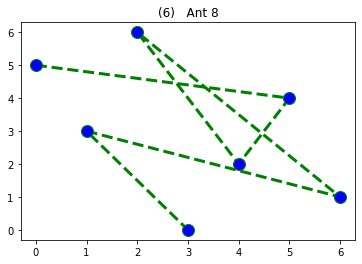

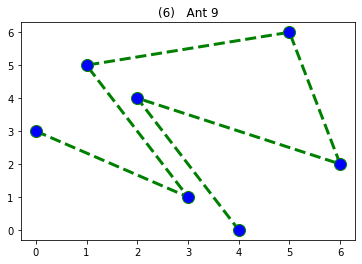

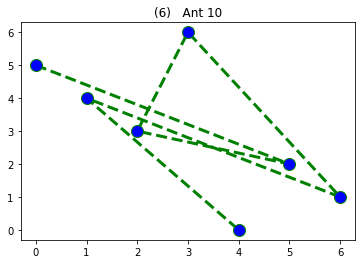



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 6 ++++++++++++++++++++++++++++++++++++++++++++++


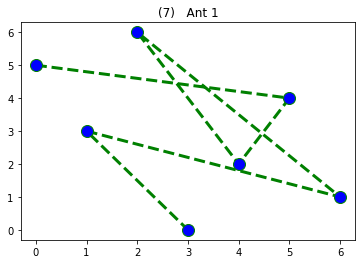

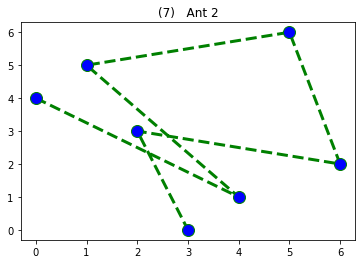

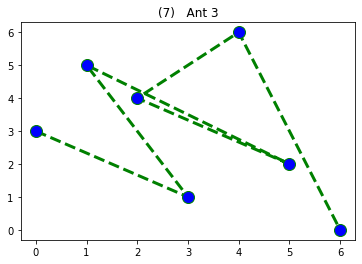

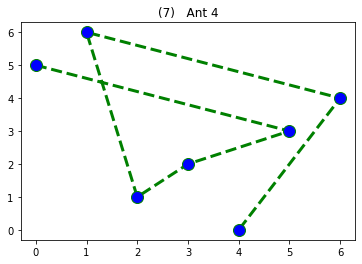

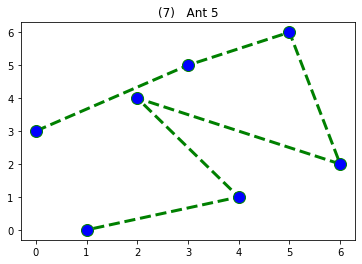

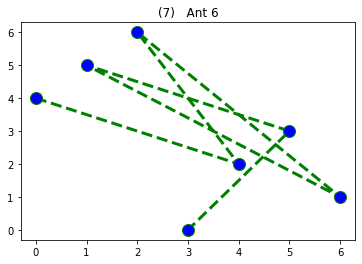

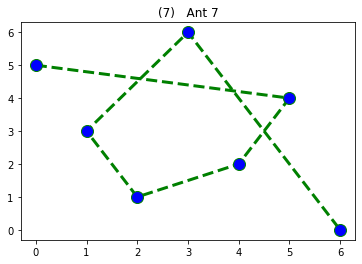

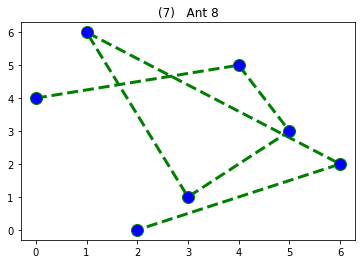

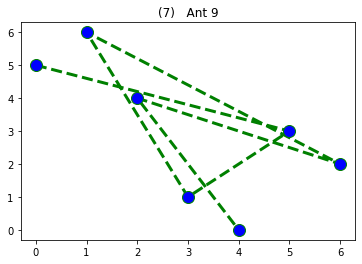

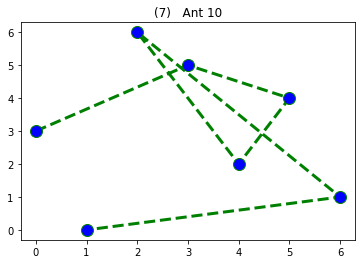



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 7 ++++++++++++++++++++++++++++++++++++++++++++++


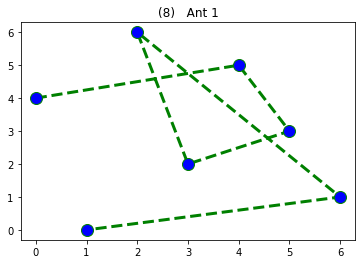

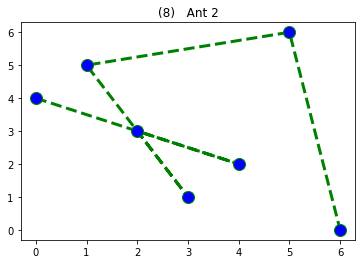

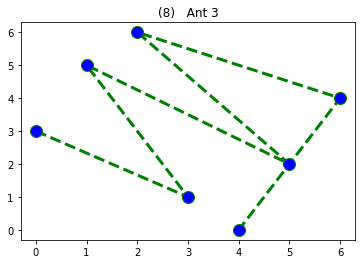

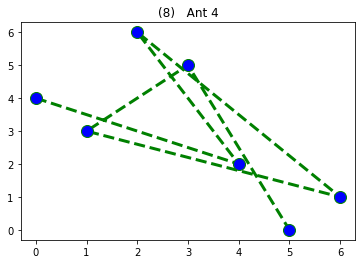

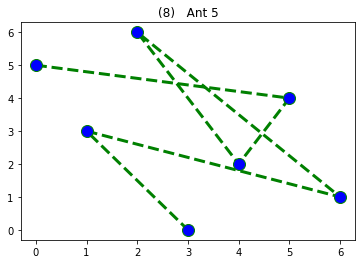

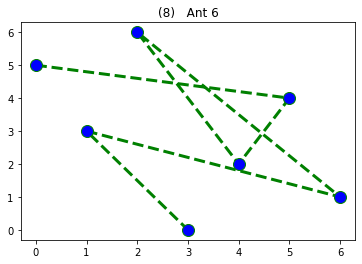

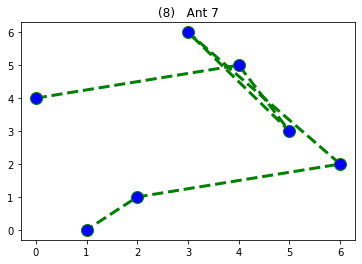

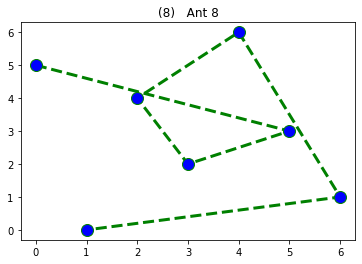

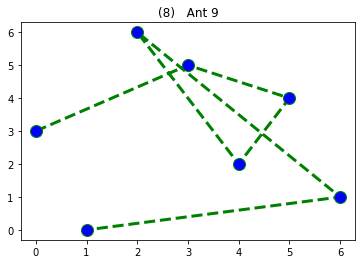

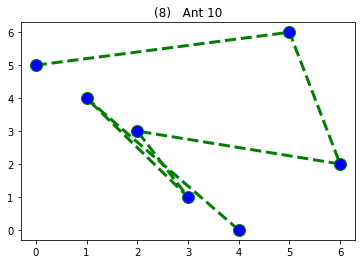



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 8 ++++++++++++++++++++++++++++++++++++++++++++++


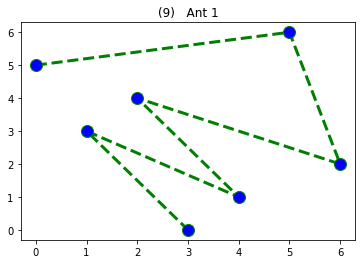

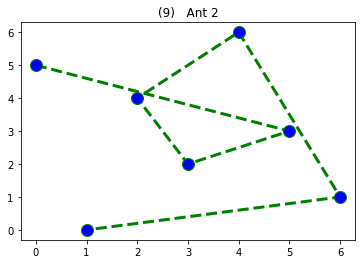

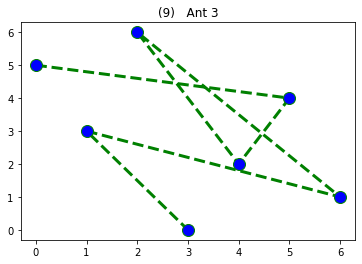

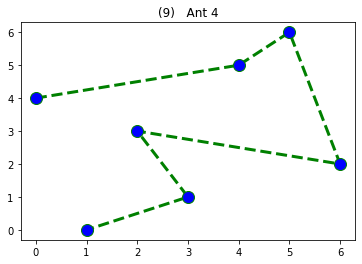

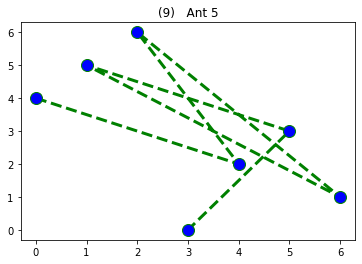

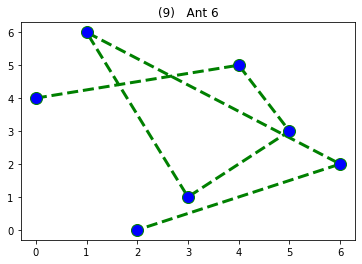

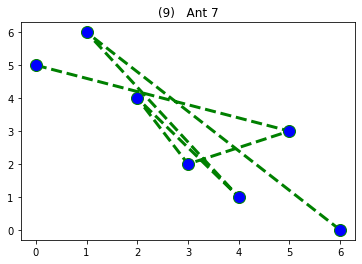

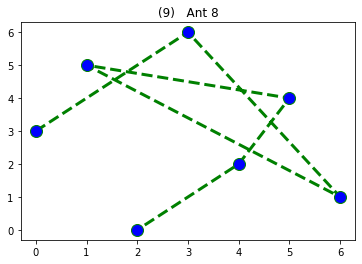

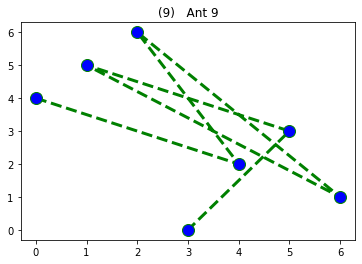

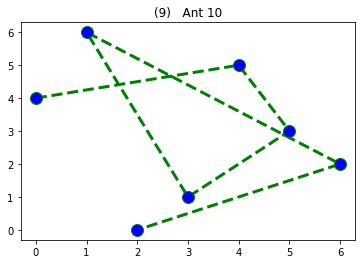



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 9 ++++++++++++++++++++++++++++++++++++++++++++++


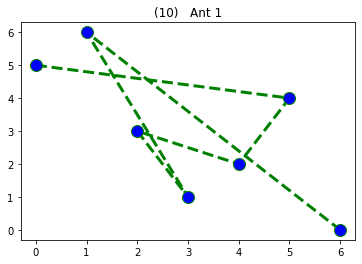

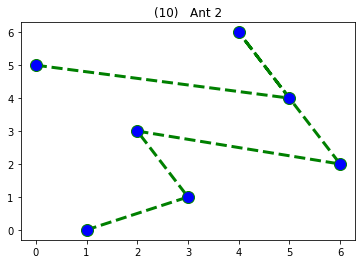

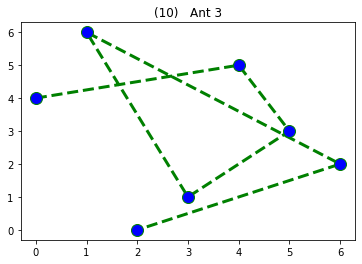

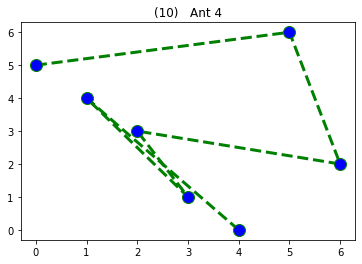

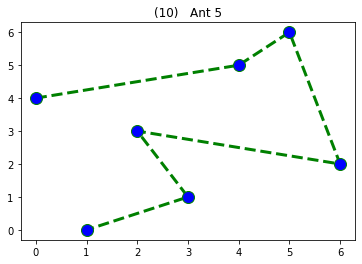

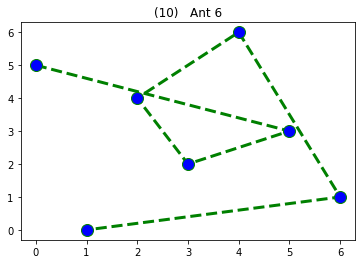

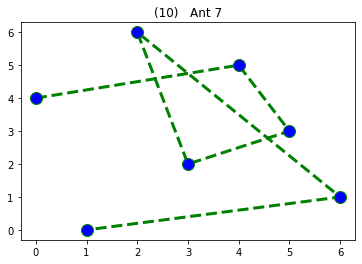

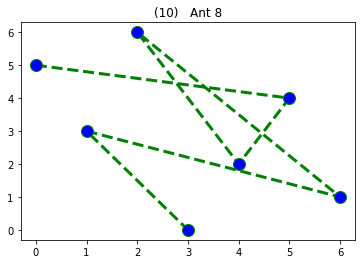

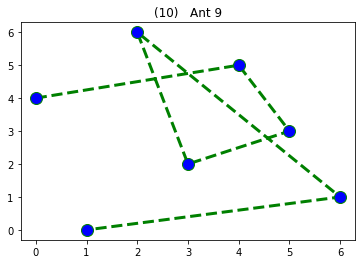

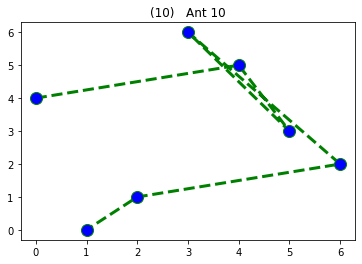



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 10 ++++++++++++++++++++++++++++++++++++++++++++++


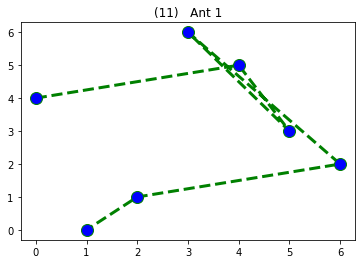

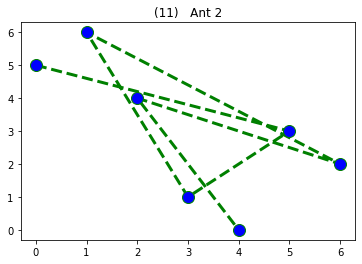

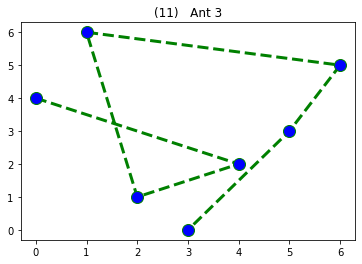

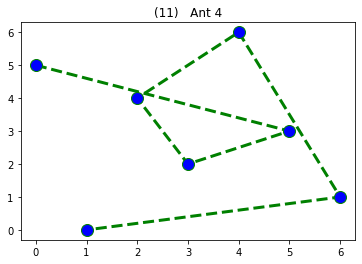

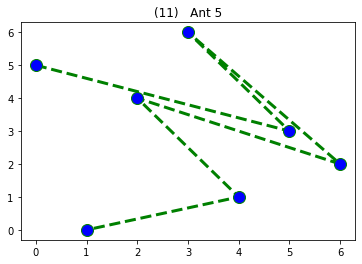

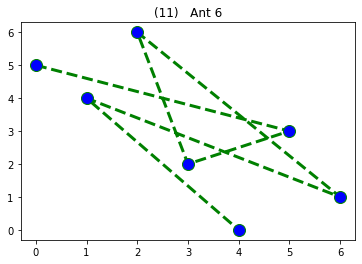

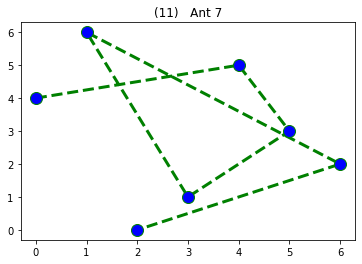

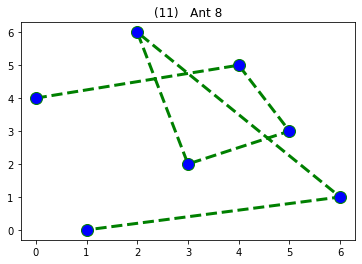

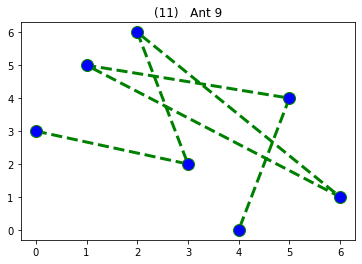

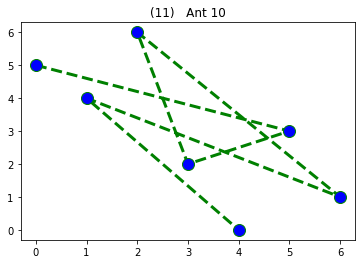



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 11 ++++++++++++++++++++++++++++++++++++++++++++++


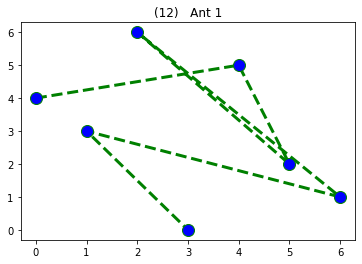

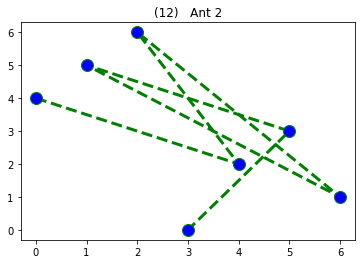

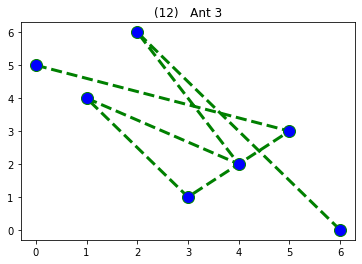

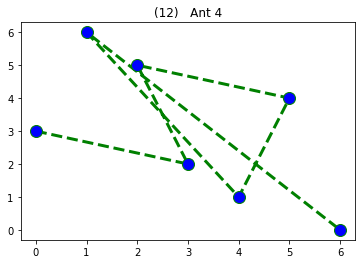

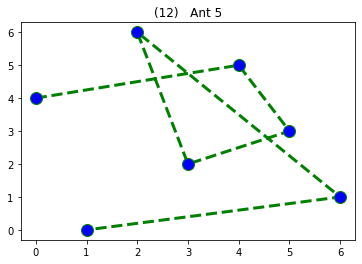

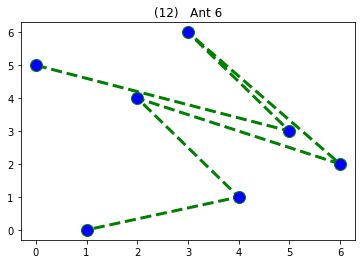

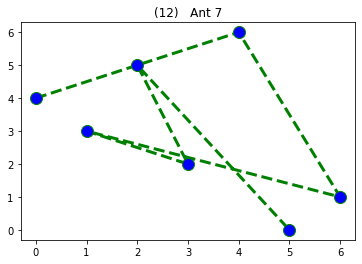

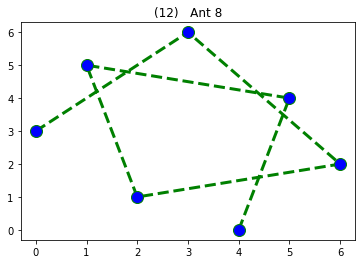

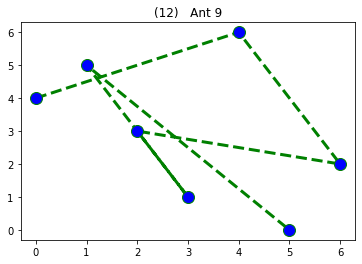

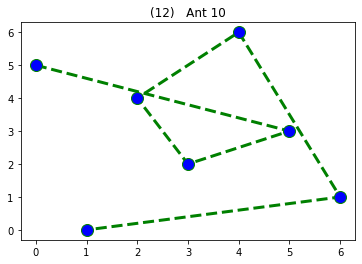



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 12 ++++++++++++++++++++++++++++++++++++++++++++++


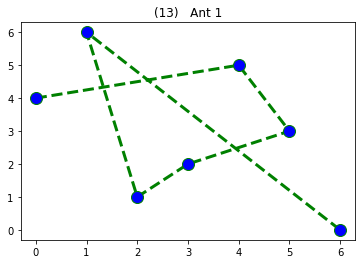

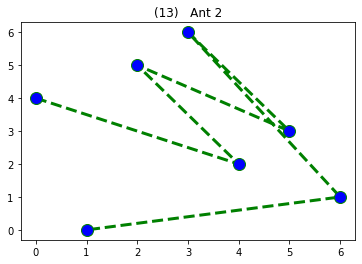

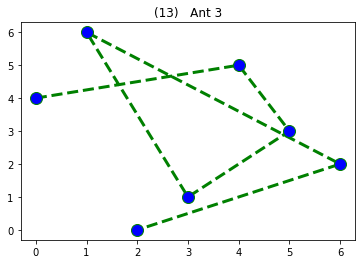

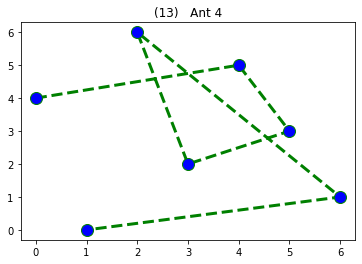

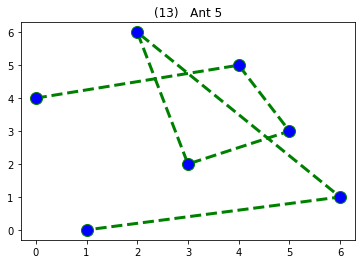

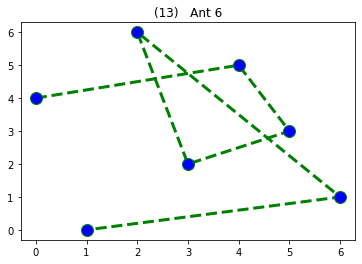

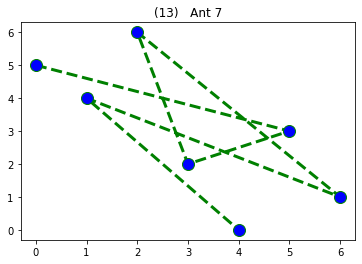

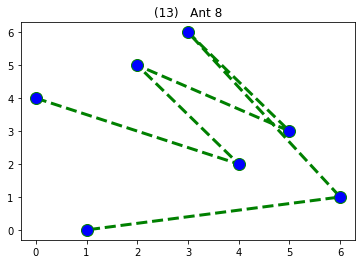

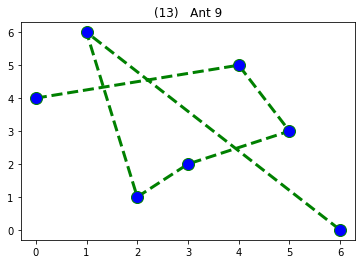

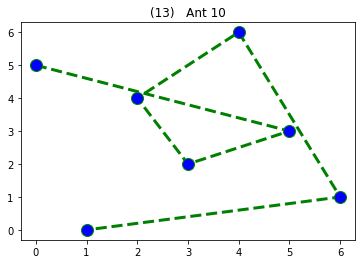



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 13 ++++++++++++++++++++++++++++++++++++++++++++++


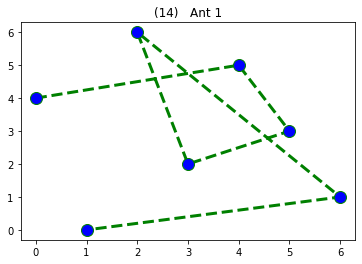

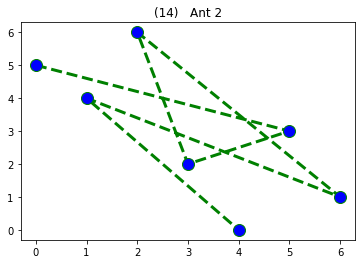

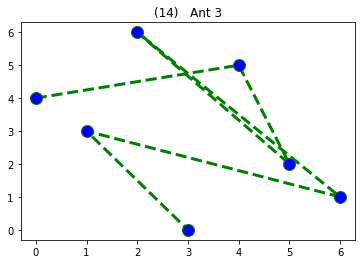

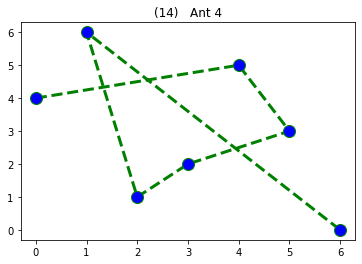

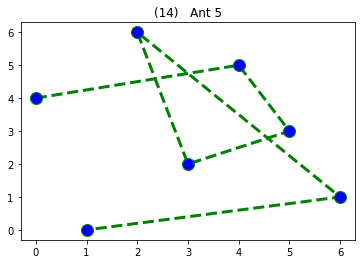

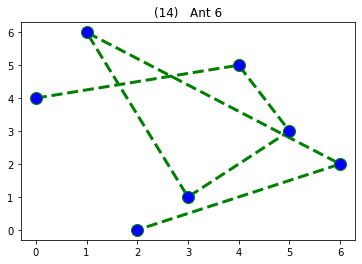

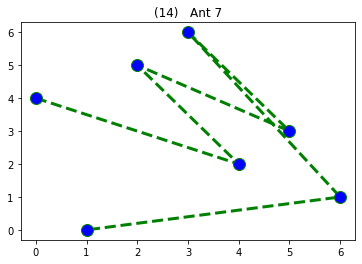

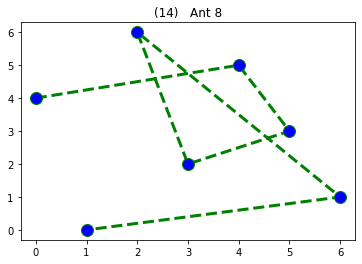

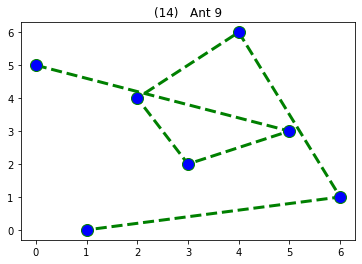

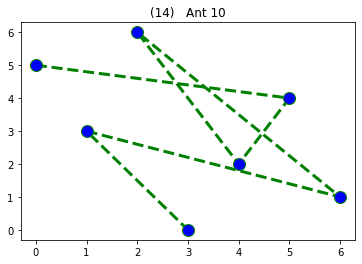



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 14 ++++++++++++++++++++++++++++++++++++++++++++++


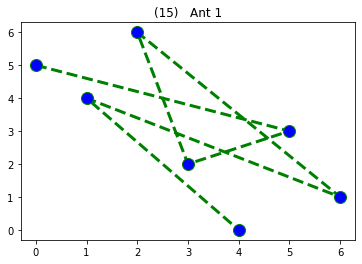

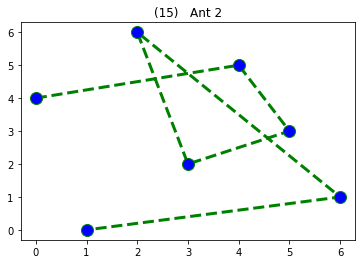

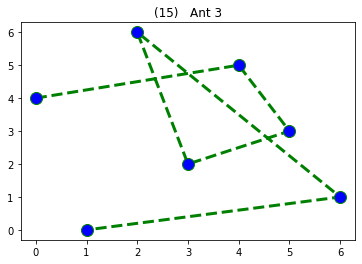

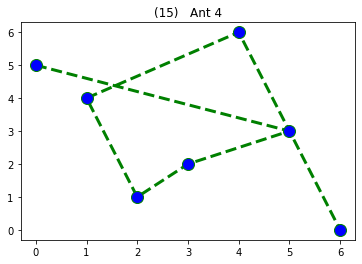

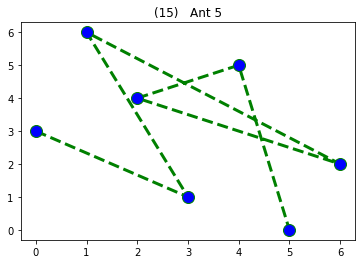

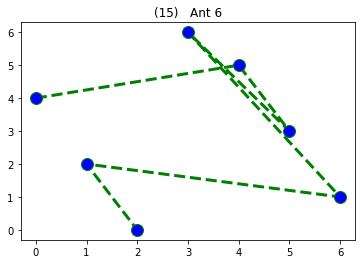

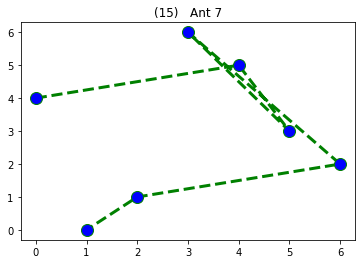

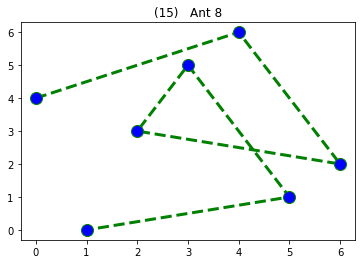

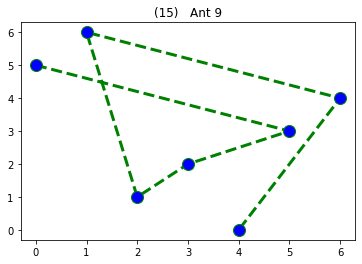

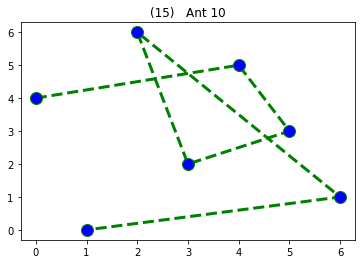



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 15 ++++++++++++++++++++++++++++++++++++++++++++++


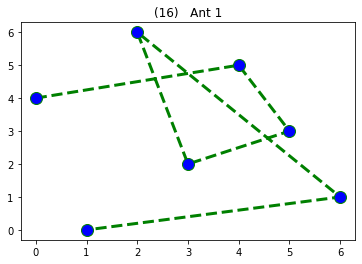

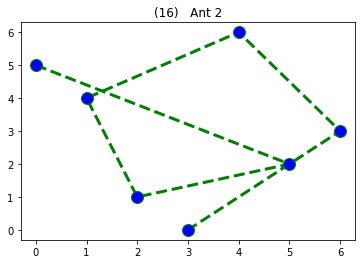

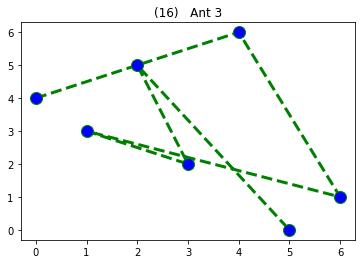

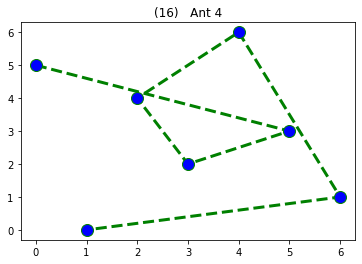

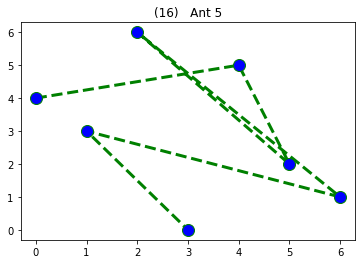

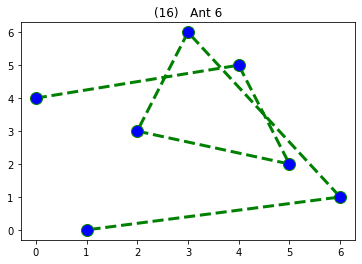

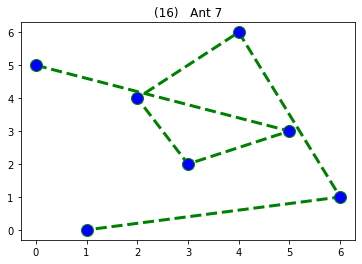

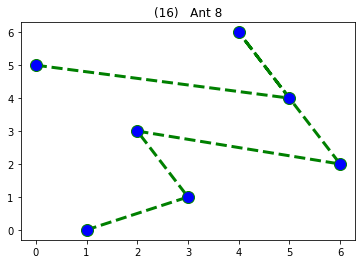

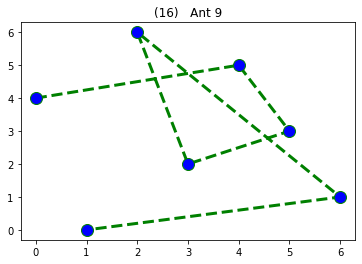

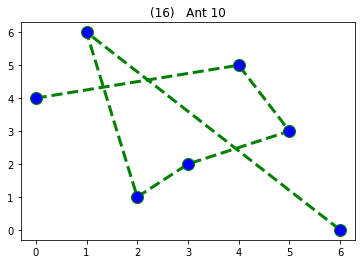



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 16 ++++++++++++++++++++++++++++++++++++++++++++++


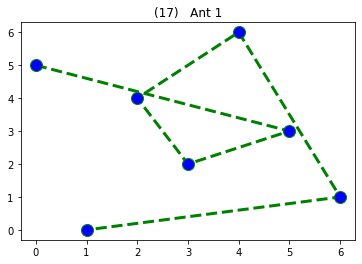

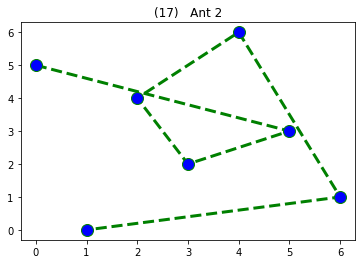

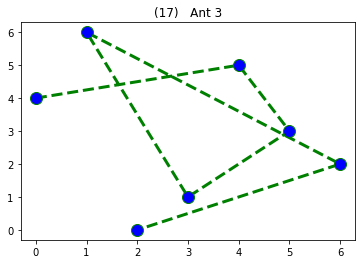

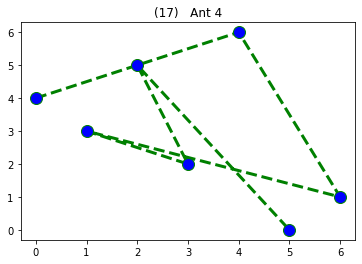

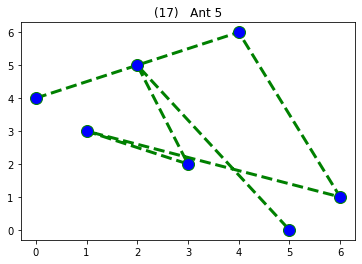

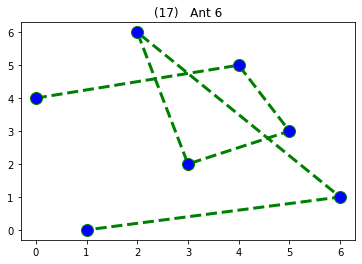

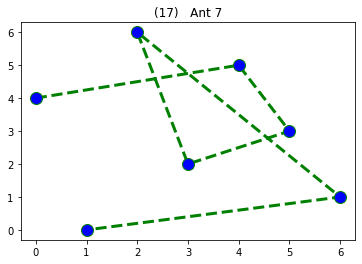

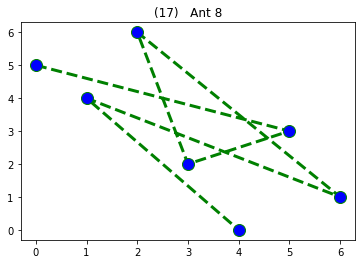

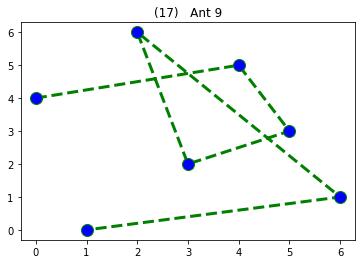

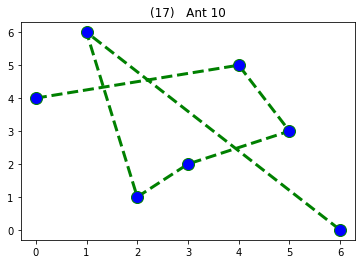



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 17 ++++++++++++++++++++++++++++++++++++++++++++++


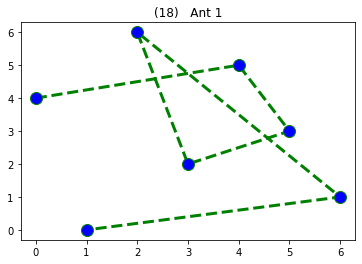

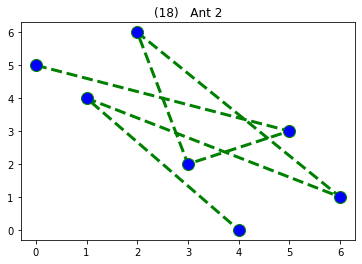

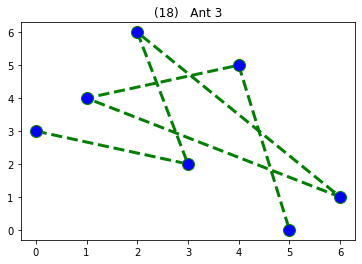

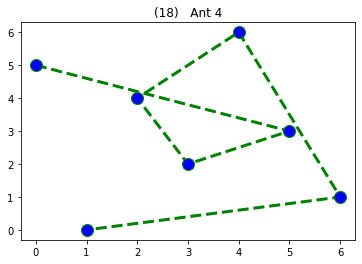

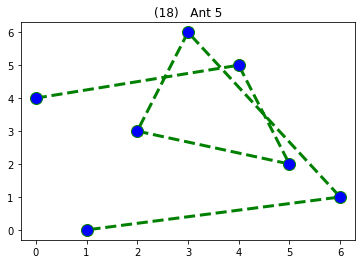

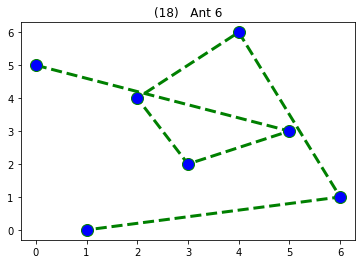

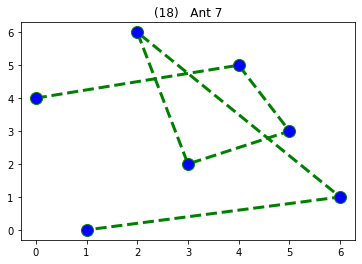

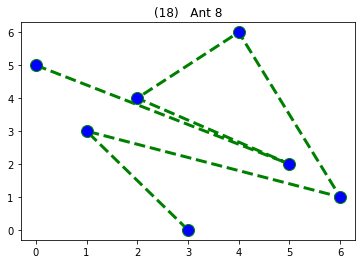

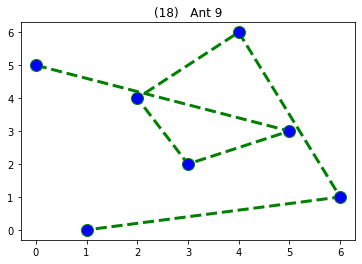

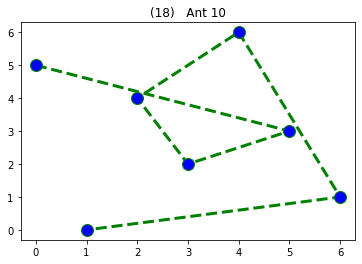



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 18 ++++++++++++++++++++++++++++++++++++++++++++++


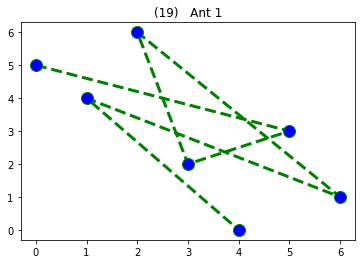

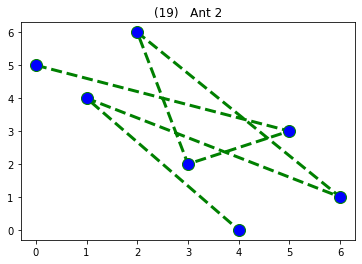

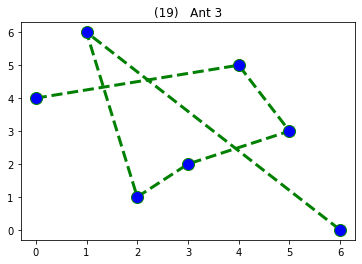

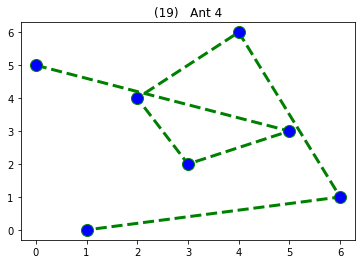

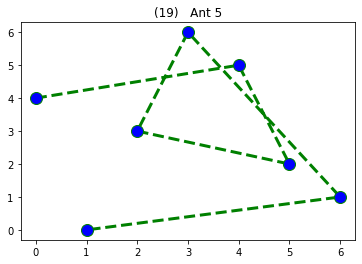

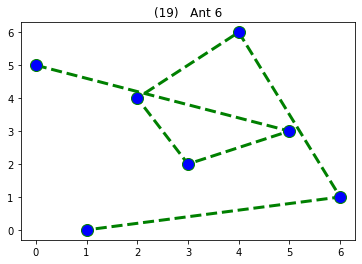

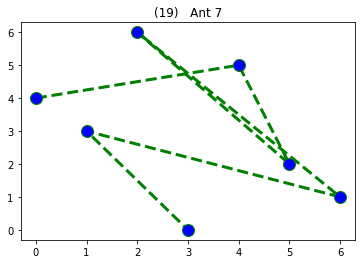

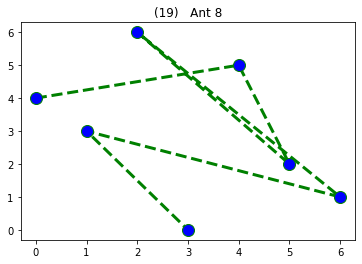

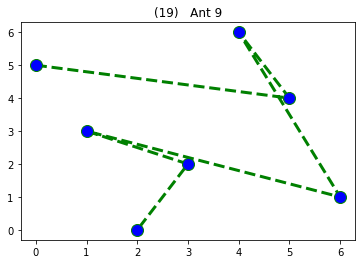

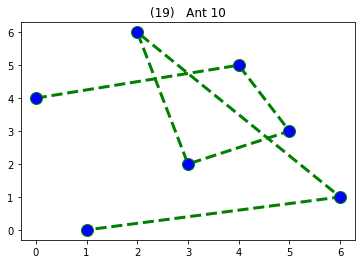



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++ STEP 19 ++++++++++++++++++++++++++++++++++++++++++++++


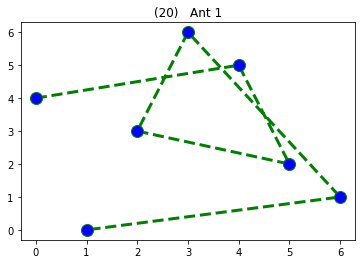

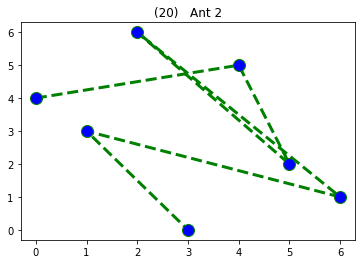

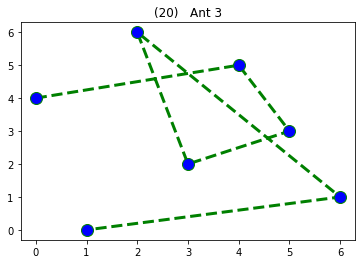

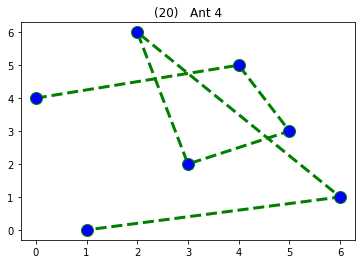

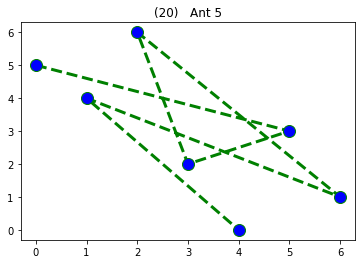

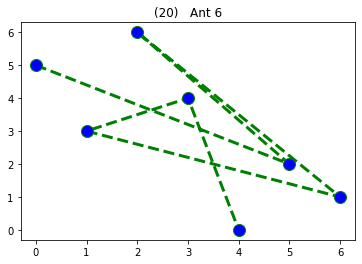

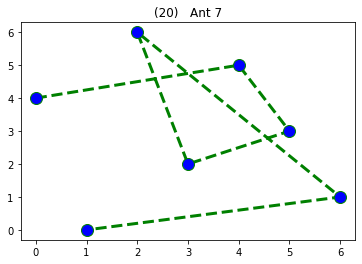

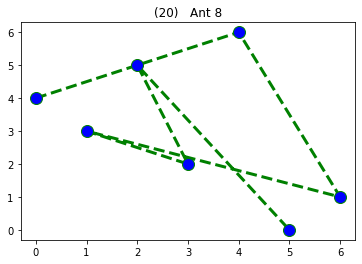

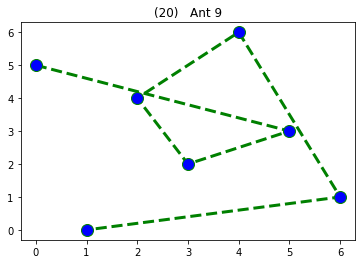

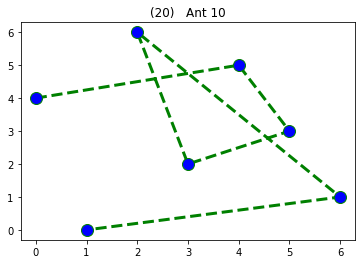



------------------------------------------------------------------------------------------------
|                                                                                              |
| Best solution ( 37.19412572662503 ):  (0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  
|                                                                                              |
------------------------------------------------------------------------------------------------


Ants: [10]
Costs: [37.19412572662503]
Paths: ['(0,3)  (3,5)  (5,4)  (4,2)  (2,6)  (6,1)  (1,0)  ']
Times: [12.146]


In [31]:
path = os.path.join(os.getcwd(), 'dataset', 'tsp', "instance7.txt")
cities = read_data(path)

m = 10 # number of ants
n = len(cities) # number of cities
tours = 20 # number of tours

iterations = 1

ants = []

times = []

costs = []
paths = []

#current_milli_time = lambda: int(round(time.time() * 1000))


for it in range(iterations):
    
    ants.append(m)
    
    start=datetime.now()
    
    best_cost, best_path = aco(cities, m, n, tours)
    
    costs.append(best_cost)
    paths.append(solution_string(best_path))
    
    time = datetime.now()-start

    times.append(time.microseconds*0.001)
    
    m+=5

print("Ants:", ants)
print("Costs:", costs)
print("Paths:", paths)
print("Times:", times)
